## 目录
- ### Part 0 导包
- ### Part 1 数据准备
 - **1.1 数据读取**
 - **1.2 数据概览**
 - **1.3 数据清洗**
   - a. 数据去重，删除数据中的重复记录；
   - b. 时间格式数据处理；
   - c. 异常值处理，根据与均值的偏差(6sigma原理)进行异常值的筛选；
   - d. 缺失值处理，先对缺失值做初步的填充，将类别型变量标记为"Missing",对连续型变量用中位数填充。 
- ### Part 2 数据探索
 - **2.1 数据载入**
 - **2.2 基本表数据**
    - 2.2.1 目标变量分析
    - 2.2.2 客群分析
 - **2.3 贷款记录表数据**
 - **2.4 贷记卡数据**
 - **2.5 准贷记卡数据**
- ### Part 3 特征工程

### Part 0 导包

In [6]:
import pandas as pd
import numpy as np
from utils import myUtils as mu
from utils import myDescribe as md
from utils import myPlot4 as mp
from utils import myNoneProcess as mn
from utils import myOutlierProccess1 as mo
import time
import missingno as msno
import pickle

from datetime import datetime
from dateutil import rrule
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import warnings
from warnings import warn
import seaborn as sns
from scipy import stats
import copy 
import random

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

font1=FontProperties(fname='C:/Windows/Fonts/simkai.ttf',size=12)
font2=FontProperties(fname='C:/Windows/Fonts/simkai.ttf',size=16)
warnings.filterwarnings('ignore') 


pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

### Part 1 数据准备

#### 1.1 数据读取

In [7]:
## a.数据路径
org_file_path = "../use_data/origin_data/"  # 原始数据路径
pro_file_path = "../use_data/processed_data/" # 处理过后数据存放路径

In [8]:
## b.读取数据
#jiben_var_info = pd.read_csv(pro_file_path + "use_jiben_var_info.csv", sep= ',')
# loan_var_info = pd.read_csv(org_file_path + "kw_poc_loan_20200424.csv")
# query_var_info = pd.read_csv(org_file_path + "kw_POC_query_20200424.csv")
card_var_info = pd.read_csv(org_file_path + "kw_poc_card_20200424.csv")
# stdcard_var_info = pd.read_csv(org_file_path + "kw_poc_standardloancard_20200424.csv")

In [9]:
## c.压缩数据内存
# jiben_var_info = mu.reduce_mem_usage(jiben_var_info)
# loan_var_info = mu.reduce_mem_usage(loan_var_info)
card_var_info = mu.reduce_mem_usage(card_var_info)
# stdcard_var_info = mu.reduce_mem_usage(stdcard_var_info)

Memory usage of dataframe is 2033.06 MB
Memory usage after optimization is: 1540.68 MB
Decreased by 24.2%
time cost 9.53 seconds.


#### 1.2.数据概览

In [10]:
## 数据大小
#jiben_var_info.shape   # (1435808, 101)
#loan_var_info.shape   # (5423931, 35)
#query_var_info.shape
card_var_info.shape   # (8327433, 32)
# stdcard_var_info.shape # (145512, 32)

(8327433, 32)

In [11]:
## 查看前几行数据情况
# jiben_var_info.head()
# loan_var_info.head(20)
card_var_info.head()
# stdcard_var_info.head()

,ctime,index,financeorg,financetype,currency,opendate,creditlimitamount,guaranteetype,state,stateenddate,stateendmonth,sharecreditlimitamount,usedcreditlimitamount,latest6monthusedavgamount,usedhighestamount,scheduledpaymentdate,scheduledpaymentamount,actualpaymentamount,recentpaydate,curroverduecyc,curroverdueamount,overdue31to60amount,overdue61to90amount,overdue91to180amount,overdueover180amount,latest24monthpaymentbeginmonth,latest24monthpaymentendmonth,latest24state,latest5yearoverduebeginmonth,latest5yearoverdueendmonth,mis_date,id
0,2018-09-11 10:12:44,0,IF,商业银行,人民币,2008.09.09,2500,4|信用/免担保,1|正常,2018.08.31,NaN,2500,0.0,102.0,821.0,2018.08.31,0.0,0.0,2018.04.12,0.0,0.0,NaN,NaN,NaN,NaN,2016.089966,2018.079956,N1N12N*******NN*N12N****,NaN,NaN,20180911,8e47154fd4fefe1361209cb3c89e007a
1,2018-09-11 10:12:44,1,GY,商业银行,人民币,2006.03.15,54000,4|信用/免担保,1|正常,2018.08.10,NaN,54000,12569.0,13583.0,20929.0,2018.08.10,4009.0,4009.0,2018.07.24,0.0,0.0,NaN,NaN,NaN,NaN,2016.089966,2018.079956,NNNNNNNNNNNNNNNNNNNN1NNN,NaN,NaN,20180911,8e47154fd4fefe1361209cb3c89e007a
2,2018-09-11 10:12:44,2,GY,商业银行,美元,2006.03.15,54000,4|信用/免担保,1|正常,2018.08.10,NaN,0,0.0,0.0,0.0,2018.08.10,0.0,0.0,2006.03.15,0.0,0.0,NaN,NaN,NaN,NaN,2016.089966,2018.079956,************************,NaN,NaN,20180911,8e47154fd4fefe1361209cb3c89e007a
3,2018-09-11 10:12:44,3,YW,商业银行,人民币,2006.12.30,10000,4|信用/免担保,1|正常,2018.08.10,NaN,10000,0.0,0.0,0.0,2018.08.10,0.0,0.0,2007.12.08,0.0,0.0,NaN,NaN,NaN,NaN,2016.089966,2018.079956,************************,NaN,NaN,20180911,8e47154fd4fefe1361209cb3c89e007a
4,2018-09-11 10:12:44,4,IF,商业银行,人民币,2011.08.17,1000,4|信用/免担保,1|正常,2018.08.31,NaN,0,0.0,0.0,0.0,2018.08.31,0.0,0.0,2011.08.17,0.0,0.0,NaN,NaN,NaN,NaN,2016.089966,2018.079956,************************,NaN,NaN,20180911,8e47154fd4fefe1361209cb3c89e007a


#### 1.3 数据清洗
 - a.由统计情况可知，var_jb_32/56/36/37/38/80/83等变量缺失率均超过90%，则可以直接删除；
 - b.对缺失值进行填充，将类别型变量填充为“Missing”，将连续型变量填充为中位数；
 - c.时间格式转变，将字符串形式的时间转化为datetime格式；

######  相关工具函数

In [12]:
## 查看数据基本缺失情况
def exploration(df,almost_empty=0.9):

    start = time.time()
    
    n,m = df.shape[0],df.shape[1] 
    dtypes = pd.DataFrame(df.dtypes)
    
    # Missing Values, Nunique, Data Type
    dtypes.columns = ['data types']
    null = pd.DataFrame(df.isnull().sum())
    null.columns = ['none cnt']
    null['none percentage'] = (null['none cnt']/n).apply(lambda x: "{0:.2f}%".format(x * 100))
    null['empty'] = 1*(null['none cnt']==n)
    null['>='+str(int(almost_empty*100))+'% empty']=1*(null['none cnt']/n>=almost_empty)
    
    nunique = pd.DataFrame(df.nunique())
    nunique.columns = ['n_unique']
    
    explore_df = pd.concat([dtypes,null,nunique],axis=1)
    
    
    
    end = time.time()
    
    print('function finished one time, time cost {}seconds'.format(np.round(end-start,2)))
    
    return explore_df



###  观测点时间类型变换，同时提取出观测点时间中的年月日
def change_date_type(df, feature):
    """
    :param df: DataFrame
    :param feature: String, date feature
    :return : DataFrame
    """
    start = time.time()
    df[feature] = df[feature].map(str)
    df[feature] = df[feature].map(lambda x: datetime.strptime(x[:8], "%Y%m%d"))
    
    # df['obs_year'] = df[feature].map(lambda x: x.year)
    # df['obs_month'] = df[feature].map(lambda x: x.month)
    # df['obs_day'] = df[feature].map(lambda x: x.day)
    
    end = time.time()
    print('time cost {} seconds'.format(np.round(end-start,2)))
    return df


## 查看数据基本统计情况
def get_describe(df):
    """
    :param df: DataFrame
    :return DataFrame
    """
    start =  time.time()
    
    ##
    result1 = df.describe().T
    numeric_cols = result1.index.to_list()
    total = df.shape[0]
    result1['missing_rate(%)'] = [np.round(100.0 * df[c].isna().sum() /total, 2) for c in numeric_cols]
    result1['var_type'] = [df[c].dtypes for c in numeric_cols]
    result1['nunique'] = [df[c].nunique() for c in numeric_cols]
       
    ## 
    def get_max_percent(df, feature, modeValue):
        if modeValue is None:
            return None
        if isinstance(modeValue, float):
            modeValue = int(modeValue)
        val_cnt = df[feature].value_counts()[modeValue]
        return val_cnt / df.shape[0]
    
    result2 = pd.DataFrame(columns= ['name', 'var_type', 'mode', 'mode_pct', 'missing_number',\
                                   'missing_rate(%)', 'nunique_values'])
    cat_cols = [c for c in df.columns if c not in numeric_cols]
    for i, feature in enumerate(cat_cols):
        missingNums = df[feature].isnull().sum()
        missingRate = np.round(100 * missingNums * 1.0 / total, 2)
        nuniqueValues = df[feature].nunique()
        var_type = df[feature].dtypes 
        mode = None
        if missingNums !=total:
            mode = df[feature].mode()[0]   
        mode_pct = get_max_percent(df, feature, mode)
        result2.loc[i] = [feature, var_type, mode, mode_pct, missingNums,\
                         missingRate, nuniqueValues]
    
    end = time.time()
    print("time cost {} seconds.".format(np.round(end-start,2)))
    return result1, result2


## 查看每个类别变量各子分箱中的样本数以及坏样本占比
def bin_bad_rate(df, feature, target):
    """
    :param df: DataFrame，需计算好坏比的数据集
    :param feature: str, 需要计算好坏比的特征
    :param target: str, 目标变量
    :return: dict, 每个分箱的坏样本率
    """
    start = time.time()
    # 对特征feature的每个子分箱求出坏样本数和总数
    regroup =  pd.DataFrame(df.groupby([feature])[target].\
                            agg(['sum', 'count']))
    regroup.reset_index(level = 0, inplace = True)
    regroup.rename(columns = {'sum': 'bad', 'count': 'total'}, inplace = True)
    # 计算坏样本占比
    regroup['bad_rate'] = regroup.apply(lambda x: np.round((x.bad * 1.0) / x.total, 2), axis = 1)
    
    # 将特征值与坏样本率合成一个字典
    # dicts = dict(zip(regroup[feature], regroup['bad_rate']))
    end = time.time()
    print('time cost {} seconds'.format(np.round(end-start,2)))
    return regroup


##### 1.3.1 数据整体的缺失情况

In [13]:
# 数据缺失情况
# jiben_explore_df = exploration(jiben_var_info)
# loan_explore_df = exploration(loan_var_info)
card_explore_df = exploration(card_var_info)

function finished one time, time cost 46.9seconds


In [9]:
jiben_explore_df.sort_values(by = "none cnt", ascending= False).head(8)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
var_jb_32,float64,1435808,100.00%,1,1,0
var_jb_56,float64,1435808,100.00%,1,1,0
var_jb_36,float64,1435808,100.00%,1,1,0
var_jb_37,float64,1435808,100.00%,1,1,0
var_jb_38,float64,1435808,100.00%,1,1,0
var_jb_80,object,1435807,100.00%,0,1,1
var_jb_83,object,1435807,100.00%,0,1,1
var_jb_75,object,1435407,99.97%,0,1,398


In [10]:
## a.删除基本表中缺失率较高的列
cond1 = jiben_explore_df['>=90% empty'] == 1
drop_jiben_vars_lst = jiben_explore_df.loc[cond1].index.to_list()
jiben_var_info.drop(columns= drop_jiben_vars_lst, inplace= True)

In [11]:
loan_explore_df.sort_values(by = "none cnt", ascending= False).head(8)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
stateendmonth,float64,5423931,100.00%,1,1,0
latest5yearoverdueendmonth,float32,5281287,97.37%,0,1,97
latest5yearoverduebeginmonth,float32,5281287,97.37%,0,1,99
remainpaymentcyc,float32,3769383,69.50%,0,0,362
overdue91to180amount,float32,3608318,66.53%,0,0,42
recentpaydate,object,3608318,66.53%,0,0,1684
actualpaymentamount,float32,3608318,66.53%,0,0,31000
scheduledpaymentdate,object,3608318,66.53%,0,0,1333


In [12]:
## a.删除贷款表中缺失率较高的列
cond2 = loan_explore_df['>=90% empty'] == 1
drop_loan_vars_lst = loan_explore_df.loc[cond2].index.to_list()
loan_var_info.drop(columns= drop_loan_vars_lst, inplace= True)

In [14]:
card_explore_df.sort_values(by = "none cnt", ascending= False).head(8)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
stateendmonth,float64,8327433,100.00%,1,1,0
overdue61to90amount,float64,8327433,100.00%,1,1,0
overdueover180amount,float64,8327433,100.00%,1,1,0
overdue31to60amount,float64,8327433,100.00%,1,1,0
overdue91to180amount,float64,8327433,100.00%,1,1,0
latest5yearoverdueendmonth,float32,8002497,96.10%,0,1,93
latest5yearoverduebeginmonth,float32,8002497,96.10%,0,1,97
latest6monthusedavgamount,float32,2229897,26.78%,0,0,84625


In [15]:
## a.删除基本表中缺失率较高的列
cond1 = card_explore_df['>=90% empty'] == 1
drop_card_vars_lst = card_explore_df.loc[cond1].index.to_list()
card_var_info.drop(columns= drop_card_vars_lst, inplace= True)

###### 1.3.2 查看数据的基本统计情况：众数、中位数、最值等

In [14]:
# 基本表的统计情况：众数、中位数、最值等
#jiben_describe1, jiben_describe2 = get_describe(jiben_var_info)
jiben_describe1.head(20)
#jiben_describe2.head(40)

,count,mean,std,min,25%,50%,75%,max,missing_rate(%),var_type,nunique
bad,1435808.0,6.951974e-01,0.917462,0.0,0.0,0.000000e+00,2.0,2.0,0.00,float32,3
nasrdw_recd_date,1435808.0,2.018322e+07,4377.440195,20140402.0,20180430.0,2.018092e+07,20190107.0,20190331.0,0.00,int32,539
var_jb_1,1435744.0,3.252858e+01,8.290299,18.0,26.0,3.100000e+01,37.0,83.0,0.00,float32,62
var_jb_7,1435488.0,2.729394e+00,2.341153,1.0,2.0,2.000000e+00,2.0,20.0,0.02,float32,4
var_jb_9,1435703.0,3.119227e+02,3568.336426,0.0,80.0,1.000000e+02,150.0,1000000.0,0.01,float32,533
var_jb_12,1435766.0,4.627674e+00,1.762863,0.0,4.0,5.000000e+00,6.0,99.0,0.00,float32,32
var_jb_13,1435740.0,5.087592e+02,319.250214,1.0,250.0,5.300000e+02,790.0,9999.0,0.00,float32,91
var_jb_14,1435808.0,2.866615e+02,200.659180,2.0,205.0,2.070000e+02,212.0,999.0,0.00,float32,57
var_jb_15,1435808.0,6.935054e+02,466.700096,11.0,152.0,1.027000e+03,1029.0,3060.0,0.00,int16,62
var_jb_19,1418809.0,2.463263e-02,0.154207,0.0,0.0,0.000000e+00,0.0,1.0,1.18,float32,2


In [15]:
# 贷款表的统计情况：众数、中位数、最值等
loan_describe1, loan_describe2 = get_describe(loan_var_info)
loan_describe1.head(30)
# loan_describe2.head()

time cost 42.32 seconds.


,count,mean,std,min,25%,50%,75%,max,missing_rate(%),var_type,nunique
index,5423931.0,1.568513e+01,35.380580,0.000000e+00,1.000000e+00,5.000000e+00,1.600000e+01,7.500000e+02,0.00,int16,751
creditlimitamount,5423931.0,5.764560e+04,235851.727116,0.000000e+00,1.500000e+03,5.000000e+03,3.000000e+04,9.500000e+07,0.00,int32,54746
balance,1815656.0,7.081762e+04,244202.375000,0.000000e+00,1.100000e+03,4.752000e+03,3.954000e+04,4.700000e+07,66.53,float32,238200
remainpaymentcyc,1654548.0,3.747898e+01,75.750259,0.000000e+00,5.000000e+00,1.000000e+01,2.000000e+01,3.610000e+02,69.50,float32,362
scheduledpaymentamount,1815613.0,1.187726e+03,6918.536133,0.000000e+00,0.000000e+00,2.720000e+02,1.416000e+03,5.000000e+06,66.53,float32,20666
actualpaymentamount,1815613.0,1.690379e+03,13969.389648,0.000000e+00,0.000000e+00,3.090000e+02,1.575000e+03,1.002757e+07,66.53,float32,31000
curroverduecyc,1815613.0,1.638014e-03,0.067678,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01,66.53,float32,16
curroverdueamount,1815613.0,9.043736e+00,2054.923096,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+06,66.53,float32,1205
overdue31to60amount,1815613.0,2.254581e+00,1128.521240,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+06,66.53,float32,123
overdue61to90amount,1815613.0,1.758266e-01,160.019913,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+05,66.53,float32,50


In [16]:
# 贷记卡表的统计情况：众数、中位数、最值等
card_describe1, card_describe2 = get_describe(card_var_info)
card_describe1.head(30)
# card_describe2.head()

time cost 54.83 seconds.


,count,mean,std,min,25%,50%,75%,max,missing_rate(%),var_type,nunique
index,8327433.0,5.619027e+00,6.318759,0.000000e+00,1.000000e+00,4.000000e+00,8.000000e+00,1.930000e+02,0.00,int16,194
creditlimitamount,8327433.0,1.647909e+04,22437.402862,0.000000e+00,4.686000e+03,1.000000e+04,2.000000e+04,3.000000e+06,0.00,int32,103195
sharecreditlimitamount,8327433.0,1.000235e+04,20474.957316,0.000000e+00,0.000000e+00,1.000000e+03,1.200000e+04,5.000000e+06,0.00,int32,80159
usedcreditlimitamount,6097856.0,5.275439e+03,12452.635742,0.000000e+00,0.000000e+00,0.000000e+00,5.479000e+03,3.017953e+06,26.77,float32,90620
latest6monthusedavgamount,6097536.0,4.796292e+03,11118.573242,0.000000e+00,0.000000e+00,3.400000e+02,5.391000e+03,3.014392e+06,26.78,float32,84625
usedhighestamount,6097536.0,1.076681e+04,21730.392578,0.000000e+00,0.000000e+00,3.035000e+03,1.359600e+04,3.219341e+06,26.78,float32,128171
scheduledpaymentamount,6097536.0,6.449309e+02,2202.423096,0.000000e+00,0.000000e+00,0.000000e+00,5.490000e+02,1.998886e+06,26.78,float32,24473
actualpaymentamount,6097536.0,3.918295e+03,9866.042969,0.000000e+00,0.000000e+00,0.000000e+00,3.430000e+03,1.998886e+06,26.78,float32,72130
curroverduecyc,6097536.0,1.897488e-03,0.070930,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e+01,26.78,float32,24
curroverdueamount,6097536.0,7.902243e-01,88.617783,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.102250e+05,26.78,float32,1572


##### 1.3.3  时间格式处理
- 1).对于基本表中涉及的时间类字段包括：观测点，身份证有效期、毕业时间，入学年份，分别对应变量nasrdw_recd_date、var_jb_43/46/52；
- 2).其中观测点对应的时间数据无缺失可直接转换为datatime格式，而毕业时间缺失率超过90%可直接删除；
- 3).毕业时间字段中有如"99991232"等异常值和缺失值，则需先对异常值和缺失值做处理（如截尾和众数填充）且只取年和月；

In [16]:

# a.观察点没有缺失值，可直接进行时间格式转换
jiben_var_info = change_date_type(jiben_var_info, 'nasrdw_recd_date')

# b.入学年份（var_jb_52）缺失率超过90%，直接删除了该字段；

# c.身份证有效期
## 身份证有效期缺失值用中位数填充，并且只取到月份
jiben_var_info_copy = mn.impute_none_with_avg(jiben_var_info, strategy= 'median', cols=['var_jb_43'], inplace= True)

## 身份证有效期的划分为三个层次，即10年、20年和长期，则对于异常点（日期中天数值为32的逻辑异常，如20180332、99991232等）,则只取到月份
#outlier_index, para = mo.outlier_detect_with_arbitrary(jiben_var_info_copy, 'var_jb_43', 0, 21000101)
#jiben_var_info_copy = mo.impute_outlier_with_arbitrary(jiben_var_info_copy, outlier_index, 21000101, col=['var_jb_43'])

jiben_var_info_copy["var_jb_43"] = jiben_var_info_copy["var_jb_43"].apply(lambda x: str(x)[:6])
jiben_var_info_copy["var_jb_43"] = jiben_var_info_copy["var_jb_43"].apply(lambda x: datetime.strptime(x, "%Y%m"))

# d.毕业时间（var_jb_46）缺失率达到79.67%，且格式不统一，则新增变量var_jb_46_year，只取到毕业年份
jiben_var_info_copy["var_jb_46_year"] = jiben_var_info_copy["var_jb_46"].apply(lambda x: datetime.strptime(str(x)[:4], "%Y")\
                                                                               if not pd.isnull(x) else x)

time cost 17.12 seconds


In [17]:
###  观测点时间类型变换，同时提取出观测点时间中的年月日
def loan_change_date_type(df, features, length = 8):
    """
    change the date type
    """
    start = time.time()
    copy_df = copy.deepcopy(df)
    for feature in features:
        if length > 6:
            copy_df[feature] = copy_df[feature].apply(lambda x: datetime.strptime(\
                                                                        str(x).replace('.', '')[:length],\
                                                                        "%Y%m%d")  if not pd.isnull(x) \
                                                                        else x)
        else:
            copy_df[feature] = copy_df[feature].apply(lambda x: datetime.strptime(\
                                                                        str(x).replace('.', '')[:length],\
                                                                        "%Y%m")  if not pd.isnull(x) \
                                                                        else x)
    end = time.time()
    print('time cost {} seconds'.format(np.round(end-start,2)))
    return copy_df

In [62]:
## 对贷款表中的时间格式进行转换
loan_date_vars1 = ['opendate', 'enddate', 'stateenddate', 'scheduledpaymentdate', 'recentpaydate', 'mis_date']
loan_date_vars2 = ['latest24monthpaymentbeginmonth', 'latest24monthpaymentendmonth']
loan_var_info_copy = loan_change_date_type(loan_var_info, loan_date_vars1)
loan_var_info_copy = loan_change_date_type(loan_var_info_copy, loan_date_vars2, 6)

time cost 296.27 seconds
time cost 58.83 seconds


In [63]:
loan_var_info_copy.head()

,ctime,index,financeorg,financetype,type,currency,opendate,enddate,creditlimitamount,guaranteetype,paymentrating,paymentcyc,state,stateenddate,class5state,balance,remainpaymentcyc,scheduledpaymentamount,scheduledpaymentdate,actualpaymentamount,recentpaydate,curroverduecyc,curroverdueamount,overdue31to60amount,overdue61to90amount,overdue91to180amount,overdueover180amount,latest24monthpaymentbeginmonth,latest24monthpaymentendmonth,latest24state,mis_date,id
0,2018-12-26 14:00:35,0,JA,商业银行,41|个人经营性贷款,人民币,2018-02-08,2019-02-04 00:00:00,10000000,2|抵押,03|月,12期,1|正常,2018-11-21,1|正常,10000000.0,3.0,73044.0,2018-11-21,73044.0,2018-11-21,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-01,2018-10-01,//////////////*****NNNNN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
1,2018-12-26 14:00:35,1,LW,商业银行,91|个人消费贷款,人民币,2018-11-07,2020-11-07 00:00:00,43000,4|信用/免担保,03|月,24期,1|正常,2018-12-07,1|正常,41305.0,23.0,1901.0,2018-12-07,1901.0,2018-12-07,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,2018-11-01,//////////////////////*N,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
2,2018-12-26 14:00:35,2,HK,汽车金融公司,21|个人汽车贷款,人民币,2011-11-23,NaN,100000,2|抵押,03|月,37期,3|结清,2013-12-23,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
3,2018-12-26 14:00:35,3,VV,小额信贷公司,91|个人消费贷款,人民币,2015-09-01,NaN,50000,4|信用/免担保,03|月,12期,3|结清,2016-04-05,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
4,2018-12-26 14:00:35,4,LW,商业银行,91|个人消费贷款,人民币,2017-12-29,NaN,36000,4|信用/免担保,03|月,12期,3|结清,2018-02-09,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb


In [66]:
## 对相关字符串进行切割
loan_var_info_copy["type"] = loan_var_info_copy["type"].apply(lambda x: x.split("|")[0] if not pd.isnull(x) else x)
loan_var_info_copy["guaranteetype"] = loan_var_info_copy["guaranteetype"].apply(lambda x: x.split("|")[0] if not pd.isnull(x) else x)
loan_var_info_copy["class5state"] = loan_var_info_copy["class5state"].apply(lambda x: x.split('|')[0] if not pd.isnull(x) else x)
loan_var_info_copy["state"] = loan_var_info_copy["state"].apply(lambda x: x.split('|')[0] if not pd.isnull(x) else x)
loan_var_info_copy["paymentrating"] = loan_var_info_copy["paymentrating"].apply(lambda x: int(x.split("|")[0]) if not pd.isnull(x) else x)

In [67]:
## 对还款期数(paymentcyc)的字符串中进行数字提取
#loan_var_info_copy["paymentcyc"] = loan_var_info_copy["paymentcyc"].apply(lambda x: filter(str.isdigit, x) if not pd.isnull(x) else x)
loan_var_info_copy["paymentcyc"] = loan_var_info_copy["paymentcyc"].apply(lambda x: x.split("期")[0] if not pd.isnull(x) else x)

##### 1.4  数据保存

In [71]:
jiben_fw = open("../use_data/processed_data/jiben_vars_info.pickle", "wb")
loan_fw = open("../use_data/processed_data/loan_vars_info.pickle", "wb")

pickle.dump(jiben_var_info_copy, jiben_fw)
pickle.dump(loan_var_info_copy, loan_fw)

### Part 2 数据探索

**2.1 数据载入**

In [2]:
## 载入数据
jiben_fr = open("../use_data/processed_data/jiben_vars_info.pickle", "rb")
loan_fr = open("../use_data/processed_data/loan_vars_info.pickle", "rb")
jiben_vars_info = pickle.load(jiben_fr)
loan_vars_info = pickle.load(loan_fr)

In [3]:
jiben_vars_info.shape #(1435808, 84)
loan_vars_info.shape  #(5423931, 32)

(5423931, 32)

In [4]:
#jiben_vars_info.drop_duplicates(keep= 'first', inplace= True)
#loan_vars_info.drop_duplicates(keep= 'first', inplace = True)

In [5]:
loan_vars_info.shape

(5423931, 32)

In [6]:
## 内存压缩
jiben_vars_info = mu.reduce_mem_usage(jiben_vars_info)
loan_vars_info = mu.reduce_mem_usage(loan_vars_info)

Memory usage of dataframe is 607.97 MB
Memory usage after optimization is: 607.97 MB
Decreased by 0.0%
time cost 0.84 seconds.
Memory usage of dataframe is 1065.57 MB
Memory usage after optimization is: 1029.36 MB
Decreased by 3.4%
time cost 0.72 seconds.


In [7]:
jiben_vars_info.head()

,bad,nasrdw_recd_date,id,var_jb_1,var_jb_2,var_jb_3,var_jb_4,var_jb_5,var_jb_6,var_jb_7,var_jb_8,var_jb_9,var_jb_10,var_jb_11,var_jb_12,var_jb_13,var_jb_14,var_jb_15,var_jb_16,var_jb_17,var_jb_18,var_jb_19,var_jb_20,var_jb_21,var_jb_22,var_jb_23,var_jb_24,var_jb_25,var_jb_26,var_jb_27,var_jb_28,var_jb_29,var_jb_30,var_jb_31,var_jb_34,var_jb_35,var_jb_40,var_jb_41,var_jb_42,var_jb_43,var_jb_44,var_jb_45,var_jb_46,var_jb_47,var_jb_48,var_jb_49,var_jb_50,var_jb_51,var_jb_54,var_jb_55,var_jb_57,var_jb_58,var_jb_59,var_jb_60,var_jb_61,var_jb_62,var_jb_63,var_jb_64,var_jb_65,var_jb_66,var_jb_67,var_jb_68,var_jb_69,var_jb_70,var_jb_71,var_jb_72,var_jb_73,var_jb_78,var_jb_79,var_jb_81,var_jb_82,var_jb_84,var_jb_85,var_jb_86,var_jb_88,var_jb_90,var_jb_91,var_jb_92,var_jb_94,var_jb_95,var_jb_96,var_jb_97,var_jb_98,var_jb_46_year
0,0.0,2017-12-20,56a13c06ee2f2a0db827d0d9450213d3,54.0,DSXS,NT,U,M,S,10.0,O,1000.0,B,027,5.0,112.0,210.0,186,A999,1,B,0.0,1.0,0.0,91.0,125.0,0.0,0.0,0.0,125.0,2.0,1.0,0.0,2,0.0,30.0,16.0,1,14,2099-12-01 00:00:00,1.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,0.0,0.0,0.0,0.0,-99999,-99999.0,1.0,4,1.39063e+06,15.0,1.0,ç®¡çé¨é¨,0.0,1.0,æ³äººä»£è¡¨,1,0.0,0.0,0,0.0,513.0,77000.0,4.0,1.0,0.0,NaN
1,0.0,2017-12-29,c6342448d324d0e99e0d89175a2da335,31.0,BS99,SH,U,M,M,10.0,M,400.0,B,027,5.0,530.0,667.0,186,A999,1,E,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,7.0,3.0,1,4,2037-10-01 00:00:00,1.0,ç¦å·å¤§å­¦,2010,æ®é,æ¬ç§,æ¯ä¸,0,1,æ®é,æ®éå ¨æ¥å¶,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36119e+06,15.0,1.0,è¿è¥å¹³å°ææ¯ç»,0.0,1.0,é«çº§å¼åå·¥ç¨å¸,1,0.0,0.0,0,0.0,21.0,122000.0,2.0,1.0,0.0,2010
2,0.0,2018-02-08,82e5383d3b794f2555dadb7e37e9108e,36.0,TBYG,ZZ,U,F,M,2.0,M,80.0,B,027,4.0,30.0,205.0,152,PZJ9,4,E,0.0,-99999.0,0.0,136.0,136.0,0.0,28048.0,1.0,136.0,-99997.0,-99997.0,0.0,2,0.0,10.0,3.0,1,7,2037-05-01 00:00:00,1.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,0.0,0.0,0.0,0.0,-99999,-99999.0,2.0,3,1.36734e+06,15.0,1.0,å®¢æé¨,0.0,1.0,åå·¥,1,0.0,0.0,0,0.0,371.0,0.0,0.0,1.0,0.0,NaN
3,0.0,2018-03-06,a5e91382fc770d3bf1c3845d113d85a5,48.0,MY55,SU,P,F,S,2.0,M,500.0,H,027,6.0,110.0,804.0,186,A999,1,O,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,35.0,10.0,1,25,2026-05-01 00:00:00,1.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39128e+06,15.0,1.0,ç®¡çé¨,0.0,1.0,ä¸å,1,0.0,0.0,0,0.0,512.0,0.0,0.0,1.0,0.0,NaN
4,0.0,2018-03-14,57e97bcbc4090d25d1c783fcb071b6df,31.0,BS99,SH,M,M,M,2.0,M,500.0,H,027,3.0,690.0,206.0,186,9999,1,B,0.0,0.5,2.0,130.0,130.0,1.0,3122.0,2.0,130.0,4.0,2.0,0.0,2,0.0,7.0,7.0,1,0,2021-10-01 00:00:00,1.0,è¥¿å®äº¤éå¤§å­¦,2011,ç ç©¶ç,ç¡å£«ç ç©¶ç,æ¯ä¸,1,1,ç ç©¶ç,å ¨æ¥å¶,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,0.0,0.0,0.0,0.0,-99999,-99999.0,1.0,5,1.86217e+06,15.0,1.0,ä¿¡ç¨ç®¡çé¨,0.0,1.0,ä¿¡ç¨ç»ç,1,0.0,0.0,0,0.0,21.0,0.0,0.0,1.0,0.0,2011


In [10]:
jiben_explore_df = exploration(jiben_vars_info)

function finished one time, time cost 30.96seconds


In [11]:
jiben_explore_df.sort_values(by = "none cnt", ascending= False).head(10)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
var_jb_54,object,1222743,85.16%,0,0,17
var_jb_47,object,1222743,85.16%,0,0,17
var_jb_55,object,1147008,79.89%,0,0,13
var_jb_46,object,1143845,79.67%,0,0,2370
var_jb_45,object,1143845,79.67%,0,0,3914
var_jb_49,object,1143845,79.67%,0,0,2
var_jb_48,object,1143845,79.67%,0,0,9
var_jb_46_year,object,1143845,79.67%,0,0,20
var_jb_78,float32,1084693,75.55%,0,0,2
var_jb_85,object,1000160,69.66%,0,0,12898


#### 2.2 基本信息表

**2.2.1 目标变量分析**
- 查看样本比
- 训练集和测试集的样本比
- 样本的时间分布

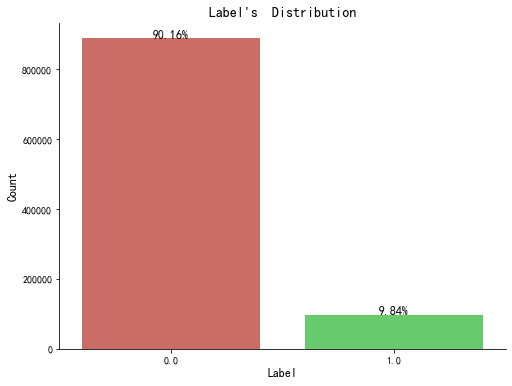

In [12]:
cond = jiben_vars_info['bad'] != 2
mp.label_plot(jiben_vars_info.loc[cond])

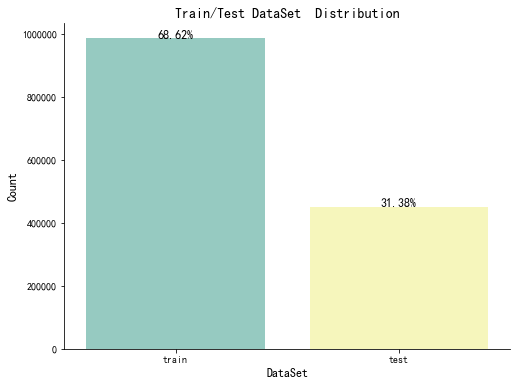

In [31]:
## 训练集和测试集的分布
jiben_vars_info_copy = copy.deepcopy(jiben_vars_info)
jiben_vars_info_copy['bad'] = jiben_vars_info_copy['bad'].map({0: 'train', 1: 'train', 2: 'test'})
fig, ax=plt.subplots(figsize=(8, 6))
total = jiben_vars_info_copy.shape[0]
g = sns.countplot(x = "bad", data= jiben_vars_info_copy, palette= "Set3") 
plt.title("Train/Test DataSet  Distribution", fontsize = 14)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('DataSet', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=12)
plt.show()
del jiben_vars_info_copy

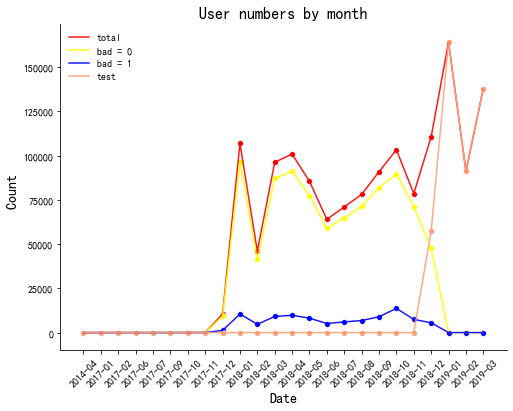

In [35]:
jiben_vars_info_copy = copy.deepcopy(jiben_vars_info)
jiben_vars_info_copy['obs_year'] = jiben_vars_info_copy['nasrdw_recd_date'].apply(lambda x: x.year)
jiben_vars_info_copy['obs_month'] = jiben_vars_info_copy['nasrdw_recd_date'].apply(lambda x: x.month)
regroup = jiben_vars_info_copy.groupby(['obs_year', 'obs_month'])['bad'].agg('count').reset_index(name = "cnt")
regroup.index = pd.PeriodIndex(year=regroup['obs_year'], \
                                          month= regroup["obs_month"], freq="M")
regroup.index = regroup.index.to_timestamp().strftime("%Y-%m")

cross_tab = pd.crosstab(jiben_vars_info_copy['bad'], [jiben_vars_info_copy['obs_year'], jiben_vars_info_copy['obs_month']])

fig, ax=plt.subplots(figsize=(8, 6))
# 绘制折线图

colors = ['red', 'yellow', 'blue', 'lightsalmon']
labels = ['total', 'bad = 0', 'bad = 1', 'test']
sns.lineplot(regroup.index, regroup.cnt, alpha=0.9, color= colors[0],\
             markers= True, dashes=False)

sns.lineplot(regroup.index, cross_tab.T[0], alpha=0.9, color= colors[1],\
             markers= True, dashes=False)
sns.lineplot(regroup.index, cross_tab.T[1], alpha=0.9, color= colors[2],\
             markers= True, dashes=False)
sns.lineplot(regroup.index, cross_tab.T[2], alpha=0.9, color= colors[3],\
             markers= True, dashes=False)

# 绘制点图
sns.scatterplot(x = regroup.index, y = regroup.cnt, color = colors[0])
sns.scatterplot(x = regroup.index, y = cross_tab.T[0], color = colors[1])
sns.scatterplot(x = regroup.index, y = cross_tab.T[1], color = colors[2])
sns.scatterplot(x = regroup.index, y = cross_tab.T[2], color = colors[3])
plt.ylabel("Count ", fontsize = 14)
plt.xlabel("Date", fontsize = 14)

lg = plt.legend(labels = labels, loc = "upper left")
lg.draw_frame(False)
# 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 45) 
plt.title("User numbers by month", fontsize = 16)
plt.show()

del jiben_vars_info_copy

#### 2.2 申请贷款客群分析
- 查看客群年龄分布
- 查看客群地域分布（国籍）
- 查看客群婚姻状况分布

In [37]:
# 基本信息表的各变量统计情况
jiben_numeric_vars_describe, jiben_cat_vars_describe = get_describe(jiben_vars_info)

time cost 28.6 seconds.


In [100]:
#jiben_numeric_vars_describe.head(10)
jiben_cat_vars_describe.head(20)
#jiben_numeric_vars_describe.tail(10)

,name,var_type,mode,mode_pct,missing_number,missing_rate(%),nunique_values
0,nasrdw_recd_date,datetime64[ns],2019-01-08 00:00:00,5.289008e-03,0,0.00,539
1,id,object,0000021fcce68959853a42e16dd3f576,6.964720e-07,0,0.00,1435808
2,var_jb_2,object,WA99,6.670182e-01,0,0.00,79
3,var_jb_3,object,SH,3.608560e-02,2533,0.18,207
4,var_jb_4,object,P,3.756373e-01,61,0.00,7
5,var_jb_5,object,M,5.858360e-01,0,0.00,3
6,var_jb_6,object,S,2.112950e-01,389144,27.10,7
7,var_jb_8,object,M,6.856766e-01,1,0.00,6
8,var_jb_10,object,B,6.893833e-01,6,0.00,4
9,var_jb_11,object,27,7.375269e-01,0,0.00,18


In [106]:
cond = jiben_vars_info['bad'] != 2
bin_bad_rate(jiben_vars_info.loc[cond], 'var_jb_97', target= 'bad')

time cost 0.16 seconds


,var_jb_97,bad,total,bad_rate
0,0.0,72.0,3496,0.02
1,1.0,89908.0,939558,0.10
2,2.0,0.0,7,0.00
3,3.0,0.0,3,0.00
4,4.0,1.0,2,0.50
5,5.0,1.0,7,0.14
6,6.0,10.0,108,0.09
7,7.0,48.0,439,0.11
8,8.0,232.0,2278,0.10
9,9.0,3453.0,24312,0.14


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


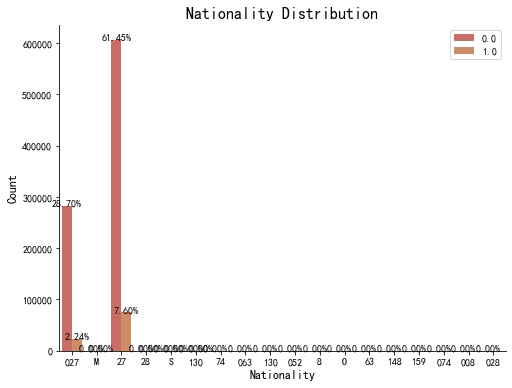

In [45]:
## a.客群国籍分布情况: 发现同一国籍对应有027和27
cond = jiben_vars_info['bad'] != 2
fig, ax = plt.subplots(figsize=(8, 6))
nunique = jiben_vars_info.loc[cond]["var_jb_11"].nunique()
g = sns.countplot(x = "var_jb_11", data= jiben_vars_info.loc[cond], palette= sns.color_palette("hls", nunique), hue = 'bad')
g.set_title("Nationality Distribution", fontsize=16)
g.set_xlabel("Nationality", fontsize=12)
g.set_ylabel("Count", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc = 'upper right')
total = jiben_vars_info.loc[cond].shape[0]
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+ p.get_width()/2.,height + 3,\
            '{:1.2f}%'.format(height/total*100),\
            ha="center", fontsize=10) 
plt.show()

posx and posy should be finite values
posx and posy should be finite values


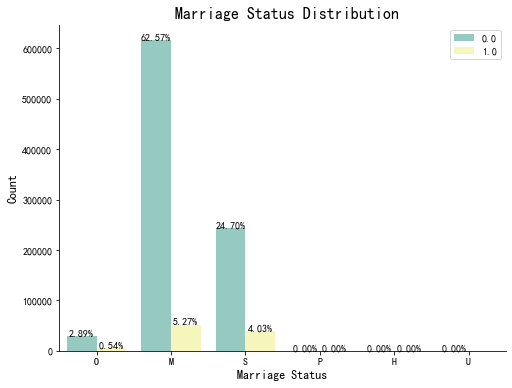

In [49]:
# b.客群婚姻状态分布(var_jb_8): M---已婚，S---单身
cond = jiben_vars_info['bad'] != 2 
fig, ax = plt.subplots(figsize=(8, 6))
nunique = jiben_vars_info.loc[cond]["var_jb_11"].nunique()
g = sns.countplot(x = "var_jb_8", data= jiben_vars_info.loc[cond], \
                  #palette= sns.color_palette("hls", nunique),\
                  palette= "Set3",
                  hue = 'bad')
g.set_title(" Marriage Status Distribution", fontsize=16)
g.set_xlabel("Marriage Status", fontsize=12)
g.set_ylabel("Count", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc = 'upper right')
total = jiben_vars_info.loc[cond].shape[0]
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+ p.get_width()/2.,height + 3,\
            '{:1.2f}%'.format(height/total*100),\
            ha="center", fontsize=10) 
plt.show()

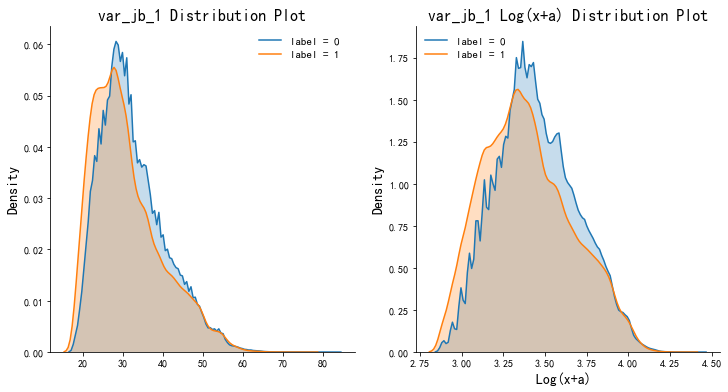

In [50]:
# c.客群年龄状态分布(var_jb_1):
cond = jiben_vars_info['bad'] != 2 
mp.plot_density_with_label(jiben_vars_info.loc[cond], 'var_jb_1')

In [21]:
# d.查看客群的学历分布


**2.3 贷款信息表**

In [13]:
## 查看数据前几行
loan_vars_info.head()

,ctime,index,financeorg,financetype,type,currency,opendate,enddate,creditlimitamount,guaranteetype,paymentrating,paymentcyc,state,stateenddate,class5state,balance,remainpaymentcyc,scheduledpaymentamount,scheduledpaymentdate,actualpaymentamount,recentpaydate,curroverduecyc,curroverdueamount,overdue31to60amount,overdue61to90amount,overdue91to180amount,overdueover180amount,latest24monthpaymentbeginmonth,latest24monthpaymentendmonth,latest24state,mis_date,id
0,2018-12-26 14:00:35,0,JA,商业银行,41,人民币,2018-02-08,2019-02-04 00:00:00,10000000,2,3,12,1,2018-11-21,1,10000000.0,3.0,73044.0,2018-11-21,73044.0,2018-11-21,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-01,2018-10-01,//////////////*****NNNNN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
1,2018-12-26 14:00:35,1,LW,商业银行,91,人民币,2018-11-07,2020-11-07 00:00:00,43000,4,3,24,1,2018-12-07,1,41305.0,23.0,1901.0,2018-12-07,1901.0,2018-12-07,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,2018-11-01,//////////////////////*N,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
2,2018-12-26 14:00:35,2,HK,汽车金融公司,21,人民币,2011-11-23,NaN,100000,2,3,37,3,2013-12-23,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
3,2018-12-26 14:00:35,3,VV,小额信贷公司,91,人民币,2015-09-01,NaN,50000,4,3,12,3,2016-04-05,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb
4,2018-12-26 14:00:35,4,LW,商业银行,91,人民币,2017-12-29,NaN,36000,4,3,12,3,2018-02-09,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2018-12-26,24cf50c509931e494b0a7ceec872e2bb


In [22]:
#loan_vars_info['ctime'] = loan_vars_info['ctime'].apply(lambda x: datetime.strptime(str(x)[:10], "%Y-%m-%d"))

In [23]:
#diff_days = loan_vars_info.apply(lambda x: x.ctime - x.mis_date, axis = 1)
#max(diff_days)

Timedelta('0 days 00:00:00')

In [33]:
# 查看数据缺失情况
loan_explore_df = exploration(loan_vars_info)
loan_explore_df.sort_values(by = "none cnt", ascending= False).head()

function finished one time, time cost 203.09seconds


,data types,none cnt,none percentage,empty,>=90% empty,n_unique
remainpaymentcyc,float32,3769383,69.50%,0,0,362
overdue91to180amount,float32,3608318,66.53%,0,0,42
scheduledpaymentdate,datetime64[ns],3608318,66.53%,0,0,1333
scheduledpaymentamount,float32,3608318,66.53%,0,0,20666
curroverduecyc,float32,3608318,66.53%,0,0,16


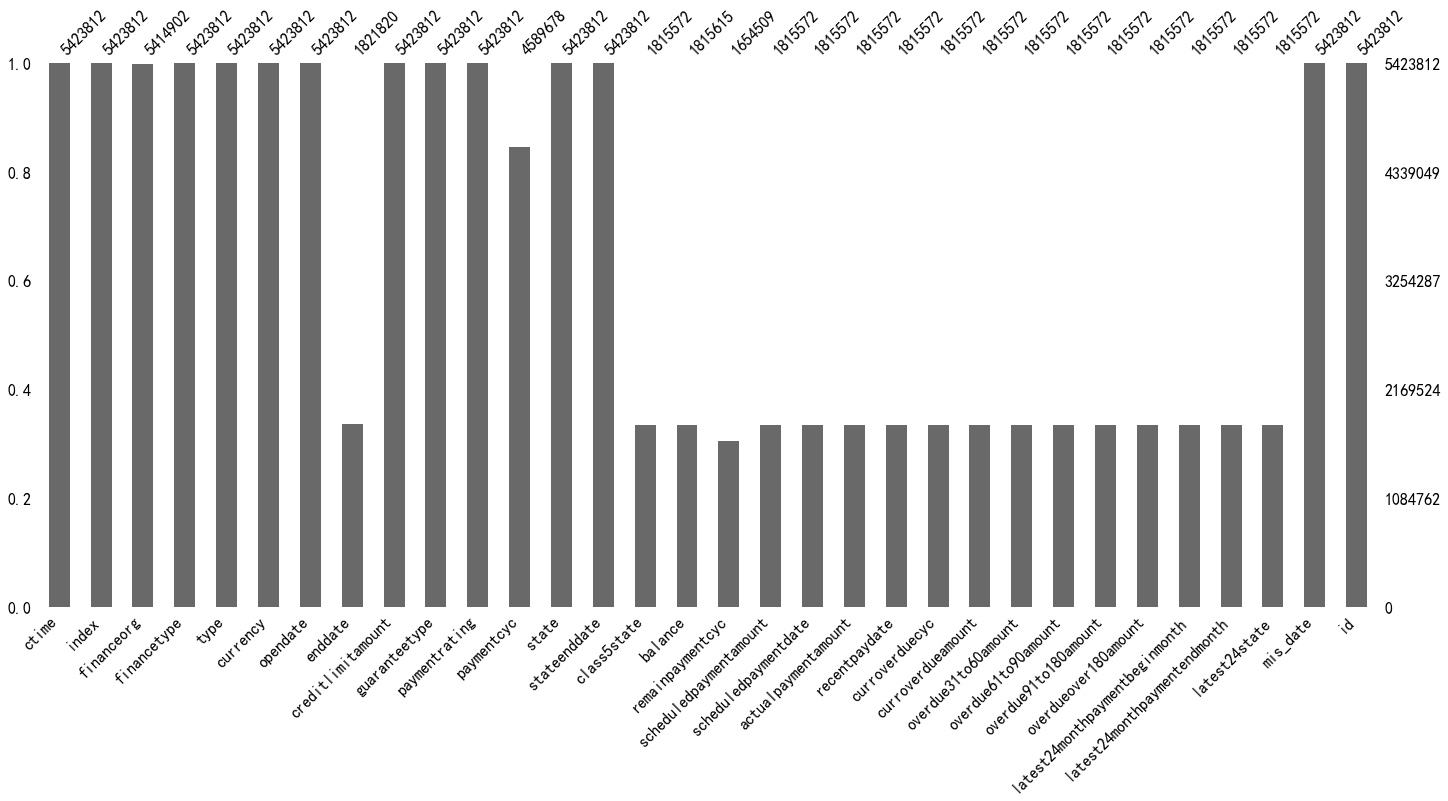

In [65]:
msno.bar(loan_vars_info)

In [66]:
## 查看具有相同缺失率的变量的缺失的相关性
missing_vars = ['overdue91to180amount', 'recentpaydate', 'actualpaymentamount', 'scheduledpaymentdate',\
               'overdue31to60amount', 'balance', 'class5state', 'overdue61to90amount', 'curroverduecyc',\
               'overdueover180amount', 'latest24monthpaymentbeginmonth', 'latest24monthpaymentendmonth',\
               'latest24state']

check_missing_data = loan_vars_info[missing_vars]

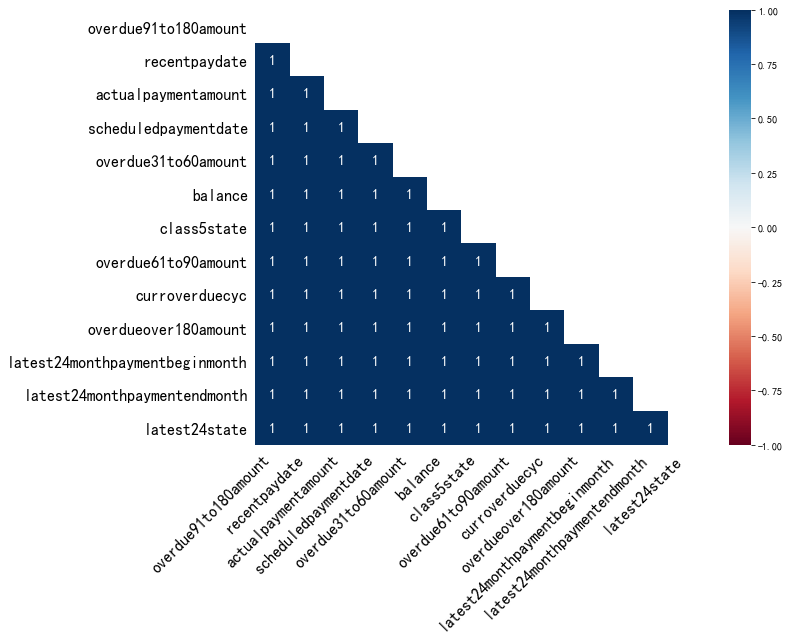

In [67]:
msno.heatmap(check_missing_data, figsize=(10, 8))

In [75]:
loan_numeric_vars_describe, loan_cat_vars_describe = get_describe(loan_vars_info)

time cost 34.25 seconds.


In [77]:
loan_numeric_vars_describe

,count,mean,std,min,25%,50%,75%,max,missing_rate(%),var_type,nunique
index,5423812.0,15.685344,35.380926,0.0,1.0,5.0,16.0,750.0,0.00,int16,751
creditlimitamount,5423812.0,57643.887519,235843.411941,0.0,1500.0,5000.0,30000.0,95000000.0,0.00,int32,54746
paymentrating,5423812.0,5.576032,13.481181,1.0,3.0,3.0,3.0,99.0,0.00,int8,9
balance,1815615.0,70815.867188,244200.906250,0.0,1100.0,4752.0,39539.0,47000000.0,66.53,float32,238200
remainpaymentcyc,1654509.0,37.478340,75.749458,0.0,5.0,10.0,20.0,361.0,69.50,float32,362
scheduledpaymentamount,1815572.0,1187.723999,6918.608398,0.0,0.0,272.0,1416.0,5000000.0,66.53,float32,20666
actualpaymentamount,1815572.0,1690.361938,13969.528320,0.0,0.0,309.0,1575.0,10027573.0,66.53,float32,31000
curroverduecyc,1815572.0,0.001638,0.067675,0.0,0.0,0.0,0.0,44.0,66.53,float32,16
curroverdueamount,1815572.0,9.041101,2054.942627,0.0,0.0,0.0,0.0,1800000.0,66.53,float32,1205
overdue31to60amount,1815572.0,2.254632,1128.534058,0.0,0.0,0.0,0.0,1300000.0,66.53,float32,123


In [78]:
loan_cat_vars_describe

,name,var_type,mode,mode_pct,missing_number,missing_rate(%),nunique_values
0,ctime,object,2018-08-21 12:21:13,0.000138,0,0.00,855776
1,financeorg,object,MC,0.002580,8910,0.16,1631
2,financetype,object,商业银行,0.578286,0,0.00,12
3,type,object,91,0.585208,0,0.00,9
4,currency,object,人民币,0.999998,0,0.00,4
5,opendate,datetime64[ns],2017-11-10 00:00:00,0.001630,0,0.00,7289
6,enddate,object,2019-01-31 00:00:00,0.001712,3601992,66.41,12166
7,guaranteetype,object,4,0.758581,0,0.00,8
8,paymentcyc,object,12,0.234657,834134,15.38,470
9,state,object,3,0.664107,0,0.00,5


In [49]:
## 删掉index列
loan_vars_info_copy = copy.deepcopy(loan_vars_info)
del loan_vars_info_copy['index']
loan_vars_info_copy.drop_duplicates(keep= 'first', inplace = True)

In [50]:
loan_vars_info_copy.shape

(5338948, 31)

In [51]:
id_group_df = loan_vars_info_copy.groupby(['id'])['id'].count().reset_index(name = "cnt")

In [52]:
id_group_ctime_df = loan_vars_info_copy.groupby(['id', 'ctime'])['id'].count().reset_index(name = "cnt")

In [53]:
id_group_misdate_df = loan_vars_info_copy.groupby(['id', 'mis_date'])['id'].count().reset_index(name = "cnt")

In [54]:
id_group_opendate_df = loan_vars_info_copy.groupby(['id', 'opendate'])['id'].count().reset_index(name = "cnt")

In [55]:
id_group_df.sort_values(by = 'cnt', ascending= False).head(10)

,id,cnt
18190,0522ed44fb1a3f2df7f2d68f6a940c92,741
144311,2893ed7557e7cb2e3d68a55587117972,721
132031,2524705f7538428438a84c53ae825471,703
180393,32bcc740c622aaec8b1ce3244072690d,647
527182,9484f8871ed9840d1f7feb692e7a109e,591
581160,a3bc9c1b3e8bf8860838352641e4828f,580
147413,297069ced656c0fd84b5037d1dde7c25,574
802664,e27d5548c0d2ea86d761e8cdac824896,565
816079,e64acf851e824061fe0697f23cf7388b,564
217441,3d304ed5b304b597920f2d578762eff0,555


In [122]:
id_group_df.shape

(906575, 2)

In [116]:
id_group_ctime_df.sort_values(by = 'cnt', ascending= False).head(10)

,id,ctime,cnt
18190,0522ed44fb1a3f2df7f2d68f6a940c92,2018-08-21 12:21:13,741
144320,2893ed7557e7cb2e3d68a55587117972,2019-01-08 14:32:47,721
132036,2524705f7538428438a84c53ae825471,2019-03-19 17:31:28.0,703
180403,32bcc740c622aaec8b1ce3244072690d,2019-03-06 17:28:24.0,647
527208,9484f8871ed9840d1f7feb692e7a109e,2018-05-06 17:07:54,591
581192,a3bc9c1b3e8bf8860838352641e4828f,2018-11-14 09:56:02,580
147422,297069ced656c0fd84b5037d1dde7c25,2019-02-16 08:30:19,574
802711,e27d5548c0d2ea86d761e8cdac824896,2019-01-05 12:12:39,565
816126,e64acf851e824061fe0697f23cf7388b,2019-01-12 17:36:57,564
217451,3d304ed5b304b597920f2d578762eff0,2018-03-19 13:33:38,555


In [132]:
#id_group_ctime_df['id'].value_counts().sort_values(ascending= False).head(10)
cond = id_group_ctime_df["id"] == '558d56373bdd3bc2d4cc2e8551aeede7'
id_group_ctime_df.loc[cond]

,id,ctime,cnt
303873,558d56373bdd3bc2d4cc2e8551aeede7,2016-08-12 08:30:54,1
303874,558d56373bdd3bc2d4cc2e8551aeede7,2016-08-12 09:00:52,1
303875,558d56373bdd3bc2d4cc2e8551aeede7,2016-08-12 09:31:08,1
303876,558d56373bdd3bc2d4cc2e8551aeede7,2016-08-12 10:03:46,1


In [109]:
id_group_misdate_df.sort_values(by = 'cnt', ascending= False).head(10)

,id,mis_date,cnt
18190,0522ed44fb1a3f2df7f2d68f6a940c92,2018-08-21,741
144311,2893ed7557e7cb2e3d68a55587117972,2019-01-08,721
132031,2524705f7538428438a84c53ae825471,2019-03-19,703
180393,32bcc740c622aaec8b1ce3244072690d,2019-03-06,647
527182,9484f8871ed9840d1f7feb692e7a109e,2018-05-06,591
581160,a3bc9c1b3e8bf8860838352641e4828f,2018-11-14,580
147413,297069ced656c0fd84b5037d1dde7c25,2019-02-16,574
802664,e27d5548c0d2ea86d761e8cdac824896,2019-01-05,565
816079,e64acf851e824061fe0697f23cf7388b,2019-01-12,564
217441,3d304ed5b304b597920f2d578762eff0,2018-03-19,555


In [131]:
cond = id_group_misdate_df["id"] == '558d56373bdd3bc2d4cc2e8551aeede7'
id_group_misdate_df.loc[cond]

,id,mis_date,cnt
303860,558d56373bdd3bc2d4cc2e8551aeede7,2018-11-12,4


In [56]:
id_group_opendate_df.sort_values(by = 'id', ascending= False).head(10)

,id,opendate,cnt
5013467,ffffeb2b8d606e540b9a32d846fe6473,2018-09-23,1
5013466,ffffeb2b8d606e540b9a32d846fe6473,2018-06-02,1
5013465,ffffeb2b8d606e540b9a32d846fe6473,2017-10-23,1
5013464,ffffeb2b8d606e540b9a32d846fe6473,2017-04-12,1
5013463,ffffbd7a05b0a7f31b85b4ca0a2a5ebe,2017-07-27,1
5013462,ffffbd7a05b0a7f31b85b4ca0a2a5ebe,2014-12-31,1
5013461,ffff93d6af18402d46a68fd8a7d5237e,2017-04-17,1
5013456,ffff7f01f127afeabdee0e5fb605d2a3,2017-09-09,1
5013453,ffff7f01f127afeabdee0e5fb605d2a3,2016-03-22,1
5013454,ffff7f01f127afeabdee0e5fb605d2a3,2016-12-19,1


In [121]:
cond = (loan_vars_info_copy['id'] == '30900c0e1d3ecaf4299283a1992930ff') & (loan_vars_info_copy['opendate'] == '2018-04-12')
#cond = loan_vars_info_copy['id'] == '30900c0e1d3ecaf4299283a1992930ff'
loan_vars_info_copy.loc[cond].shape

(35, 31)

In [58]:
id_group_df1 = loan_vars_info.groupby(['id']).agg({'opendate': ['min', 'max']}).reset_index()
id_group_df1.columns = ['id', 'min_opendate', 'max_opendate']

In [61]:
id_group_df1["max_min_opendate"] = id_group_df1.apply(lambda x: x.max_opendate - x.min_opendate, axis = 1)

In [79]:
#cond = id_group_df1['id'] == '24cf50c509931e494b0a7ceec872e2bb'
#id_group_df1.loc[cond]
#id_group_df1.sort_values(by = 'max_min_opendate', ascending= False).head(10)
cond = id_group_df1['max_min_opendate'].astype('timedelta64[D]') < 730  #(770375, 4)
id_group_df1.loc[cond]

(615636, 4)

In [80]:
615636 / 906575

0.6790789509968839

In [65]:
cond = (loan_var_info['id'] == '951623006d1f39116d77c40e69a433d3') & (loan_var_info['opendate'] == '1988.11.27')
loan_var_info.loc[cond]

,ctime,index,financeorg,financetype,type,currency,opendate,enddate,creditlimitamount,guaranteetype,paymentrating,paymentcyc,state,stateenddate,stateendmonth,class5state,balance,remainpaymentcyc,scheduledpaymentamount,scheduledpaymentdate,actualpaymentamount,recentpaydate,curroverduecyc,curroverdueamount,overdue31to60amount,overdue61to90amount,overdue91to180amount,overdueover180amount,latest24monthpaymentbeginmonth,latest24monthpaymentendmonth,latest24state,latest5yearoverduebeginmonth,latest5yearoverdueendmonth,mis_date,id
1031131,2018-11-28 15:26:39,2,NP,商业银行,51|农户贷款,人民币,1988.11.27,NaN,1539,4|信用/免担保,07|一次性,NaN,3|结清,2011.03.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20181128,951623006d1f39116d77c40e69a433d3


In [ ]:
###### 查看用户的贷款次数的分布图（截止查询日）
cnt_cats = pd.cut(id_group_opendate_df['cnt'], bins = [float('-inf'), 1, 5, 10, 20, 50, 100, np.inf])
plt.figure(figsize=(14, 6))
plt.subplot(121)
g1 = sns.distplot(id_group_df['cnt'], color= 'skyblue', bins = 10)
g1.set_title("Users' loan applying counts density distribution", fontsize=16)
g1.set_xlabel("Applying Counts")
g1.set_ylabel("Probability", fontsize=15)
g1.spines['top'].set_visible(False)
g1.spines['right'].set_visible(False)

## plot2
plt.subplot(122)
g2 = sns.countplot(cnt_cats.values, color= 'skyblue')
g2.set_title("Users' loan applying count", fontsize=16)
g2.set_ylabel("Users ", fontsize=14)
g2.set_xlabel("Bins", fontsize=14)
g2.spines['top'].set_visible(False)
g2.spines['right'].set_visible(False)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
total = len(cnt_cats)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 8,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11)
    
#plt.subplots_adjust(hspace = 0.8, top = 0.8)
plt.show()